<a href="https://colab.research.google.com/github/krunalhp/stockanalysis/blob/main/Sectoral_corel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Step 1: Define the list of NSE 100 stocks and their sector mapping (Expanded List)
nse_100_tickers = {
    # IT Sector
    'TCS.NS': 'IT', 'INFY.NS': 'IT', 'WIPRO.NS': 'IT', 'TECHM.NS': 'IT', 'HCLTECH.NS': 'IT', 'LTIM.NS': 'IT', 'NAUKRI.NS': 'IT',

    # Banking Sector
    'HDFCBANK.NS': 'Banking', 'ICICIBANK.NS': 'Banking', 'AXISBANK.NS': 'Banking', 'KOTAKBANK.NS': 'Banking',
    'SBIN.NS': 'Banking', 'IDFCFIRSTB.NS': 'Banking', 'PNB.NS': 'Banking', 'CANBK.NS': 'Banking',
    'UNIONBANK.NS': 'Banking', 'BANKBARODA.NS': 'Banking', 'INDUSINDBK.NS': 'Banking',

    # Financial Services
    'CHOLAFIN.NS': 'Financial Services', 'SHRIRAMFIN.NS': 'Financial Services', 'BAJAJFINSV.NS': 'Financial Services',
    'BAJFINANCE.NS': 'Financial Services', 'RECLTD.NS': 'Financial Services', 'PFC.NS': 'Financial Services',
    'JIOFIN.NS': 'Financial Services', 'ICICIPRULI.NS': 'Insurance', 'SBILIFE.NS': 'Insurance',
    'HDFCLIFE.NS': 'Insurance', 'ICICIGI.NS': 'Insurance',

    # Energy Sector
    'RELIANCE.NS': 'Energy', 'ONGC.NS': 'Energy', 'BPCL.NS': 'Energy', 'GAIL.NS': 'Energy',
    'IOC.NS': 'Energy', 'ADANIGREEN.NS': 'Energy', 'JSWENERGY.NS': 'Energy',
    'ADANIPOWER.NS': 'Energy', 'ATGL.NS': 'Energy', 'ADANIENSOL.NS': 'Energy',

    # FMCG Sector
    'HINDUNILVR.NS': 'FMCG', 'ITC.NS': 'FMCG', 'BRITANNIA.NS': 'FMCG',
    'NESTLEIND.NS': 'FMCG', 'DABUR.NS': 'FMCG', 'MARICO.NS': 'FMCG',
    'GODREJCP.NS': 'FMCG', 'TATACONSUM.NS': 'FMCG',

    # Pharma Sector
    'SUNPHARMA.NS': 'Pharma', 'CIPLA.NS': 'Pharma', 'DRREDDY.NS': 'Pharma',
    'DIVISLAB.NS': 'Pharma', 'BIOCON.NS': 'Pharma', 'AUROPHARMA.NS': 'Pharma',
    'TORNTPHARM.NS': 'Pharma', 'ZYDUSLIFE.NS': 'Pharma',

    # Auto Sector
    'TATAMOTORS.NS': 'Auto', 'MARUTI.NS': 'Auto', 'M&M.NS': 'Auto',
    'HEROMOTOCO.NS': 'Auto', 'BAJAJ-AUTO.NS': 'Auto', 'EICHERMOT.NS': 'Auto',
    'TVSMOTOR.NS': 'Auto', 'MOTHERSON.NS': 'Auto', 'BOSCHLTD.NS': 'Auto',
    'ASHOKLEY.NS': 'Auto',

    # Metal Sector
    'TATASTEEL.NS': 'Metals', 'JSWSTEEL.NS': 'Metals', 'HINDALCO.NS': 'Metals',
    'COALINDIA.NS': 'Metals', 'VEDL.NS': 'Metals',
    'JINDALSTEL.NS': 'Metals',

    # Realty Sector
    'DLF.NS': 'Realty', 'GODREJPROP.NS': 'Realty', 'OBEROIRLTY.NS': 'Realty',
    'PHOENIXLTD.NS': 'Realty', 'BRIGADE.NS': 'Realty', 'PRESTIGE.NS': 'Realty',
    'LODHA.NS': 'Realty',

    # Cement Sector
    'SHREECEM.NS': 'Cement', 'ULTRACEMCO.NS': 'Cement', 'AMBUJACEM.NS': 'Cement',
    'GRASIM.NS': 'Cement',

    # Capital Goods Sector
    'LT.NS': 'Capital Goods', 'BHEL.NS': 'Capital Goods', 'SIEMENS.NS': 'Capital Goods',
    'ABB.NS': 'Capital Goods', 'COFORGE.NS': 'Capital Goods',

    # Consumer Durables Sector
    'TITAN.NS': 'Consumer Durables', 'VOLTAS.NS': 'Consumer Durables',
    'HAVELLS.NS': 'Consumer Durables', 'CROMPTON.NS': 'Consumer Durables',
    'WHIRLPOOL.NS': 'Consumer Durables', 'DIXON.NS': 'Consumer Durables',
    'RAJESHEXPO.NS': 'Consumer Durables', 'TRENT.NS': 'Consumer Durables',

    # Miscellaneous
    'ADANIENT.NS': 'Misc', 'ADANIPORTS.NS': 'Misc', 'ZOMATO.NS': 'Misc',
    'PAYTM.NS': 'Misc', 'NYKAA.NS': 'Misc', 'IRCTC.NS': 'Misc',
    'DMART.NS': 'Misc', 'BEL.NS': 'Misc', 'IRFC.NS': 'Misc',

    # Defense Sector
    'HAL.NS': 'Defense',

    # Paints & Coatings
    'ASIANPAINT.NS': 'Paints & Coatings',

    # Logistics
    'INDIGO.NS': 'Logistics',

    # Power
    'POWERGRID.NS': 'Power', 'NTPC.NS': 'Power', 'TATAPOWER.NS': 'Power',
    'NHPC.NS': 'Power',

    # Telecom
    'BHARTIARTL.NS': 'Telecom',

    # Retail
    'DMART.NS': 'Retail',

    # Beverages
    'VBL.NS': 'Beverages',
}



In [8]:
# Step 2: Download historical data for the last 10 years
def download_stock_data(tickers):
    """Download adjusted close prices for given tickers over the past 5 years."""
    return yf.download(list(tickers), start='2019-01-01', end='2024-12-10')['Adj Close']


In [9]:
stock_prices = download_stock_data(nse_100_tickers.keys())

[*********************100%***********************]  113 of 113 completed


In [15]:
# Step 3: Calculate daily returns
daily_returns = stock_prices.pct_change().dropna()



36047


<ipython-input-15-274ac6892505>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_prices.pct_change().dropna()


In [11]:
# Step 4: Group tickers by sectors
sector_returns = {}
for ticker, sector in nse_100_tickers.items():
    if ticker in daily_returns.columns:
        if sector not in sector_returns:
            sector_returns[sector] = []
        sector_returns[sector].append(daily_returns[ticker])

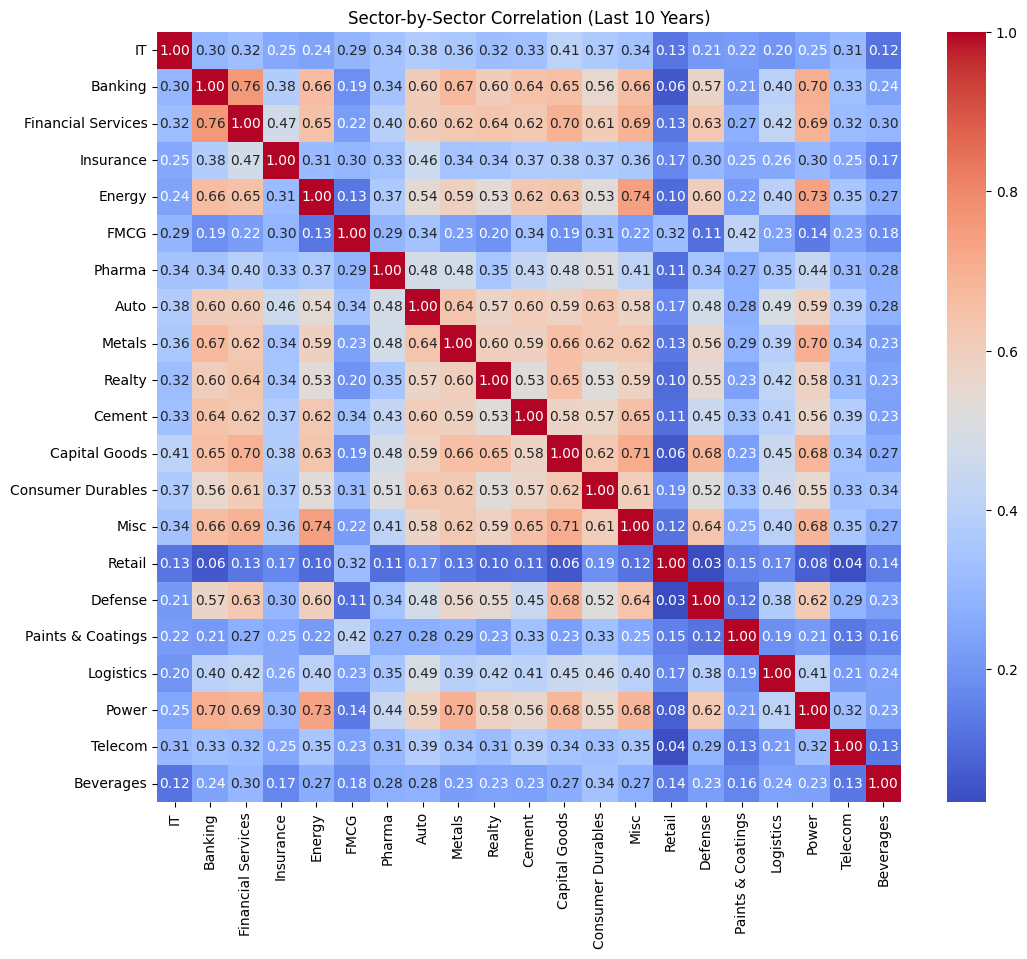


Aggregated Correlation by Sector (Last 10 Years):

Financial Services    0.526925
Capital Goods         0.522040
Misc                  0.519695
Auto                  0.508361
Metals                0.508134
Consumer Durables     0.502685
Banking               0.502033
Power                 0.498543
Cement                0.493668
Energy                0.487102
Realty                0.470230
Defense               0.443715
Pharma                0.395048
Logistics             0.375855
Insurance             0.351507
IT                    0.318438
Telecom               0.318072
FMCG                  0.279880
Paints & Coatings     0.275576
Beverages             0.264140
Retail                0.167865
dtype: float64


In [12]:
# Step 5: Create a DataFrame of sector returns
sector_data = {sector: pd.concat(returns, axis=1).mean(axis=1) for sector, returns in sector_returns.items()}
sector_df = pd.DataFrame(sector_data)

# Step 6: Calculate sector-by-sector correlation
sector_correlation = sector_df.corr()

# Step 7: Plot the sector correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sector_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Sector-by-Sector Correlation (Last 10 Years)')
plt.show()

# Step 8: Aggregate sector-wise correlation for analysis
sector_correlation_summary = sector_correlation.mean().sort_values(ascending=False)

# Step 9: Display aggregated correlation summary
print("\nAggregated Correlation by Sector (Last 10 Years):\n")
print(sector_correlation_summary)
